In [38]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from sklearn.tree import (DecisionTreeClassifier as DTC,DecisionTreeRegressor as DTR,plot_tree ,export_text)
from sklearn.metrics import (accuracy_score ,log_loss)
from sklearn.ensemble import (RandomForestRegressor as RF,GradientBoostingRegressor as GBR)

In [39]:
Carseats = pd.read_csv('Carseats.csv')
Carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [40]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [75]:
High = np.where(Carseats["Sales"] > 8,"Yes","No")
x=Carseats.drop("Sales",axis=1)
x["ShelveLoc:Good"] = (x["ShelveLoc"]=="Good").replace({True: 1, False: 0})
x["ShelveLoc:Bad"] = (x["ShelveLoc"]=="Bad").replace({True: 1, False: 0})
x.drop("ShelveLoc",axis=1,inplace=True)
x["Urban"].replace({"Yes": 1, "No": 0}, inplace=True)
x["US"].replace({"Yes": 1, "No": 0}, inplace=True)
feature_names = list(x.columns)
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc:Good,ShelveLoc:Bad
0,138,73,11,276,120,42,17,1,1,0,1
1,111,48,16,260,83,65,10,1,1,1,0
2,113,35,10,269,80,59,12,1,1,0,0
3,117,100,4,466,97,55,14,1,1,0,0
4,141,64,3,340,128,38,13,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,1,0
396,139,23,3,37,120,55,11,0,1,0,0
397,162,26,12,368,159,40,18,1,1,0,0
398,100,79,7,284,95,50,12,1,1,0,1


In [76]:
clf =DTC(max_depth=3,random_state=0,criterion='entropy')
clf.fit(x,High)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [77]:
print("Log loss: ", np.sum(log_loss(High, clf.predict_proba(x))))
print("accuracy: ", accuracy_score(High, clf.predict(x)))

Log loss:  0.4710647062649358
accuracy:  0.79


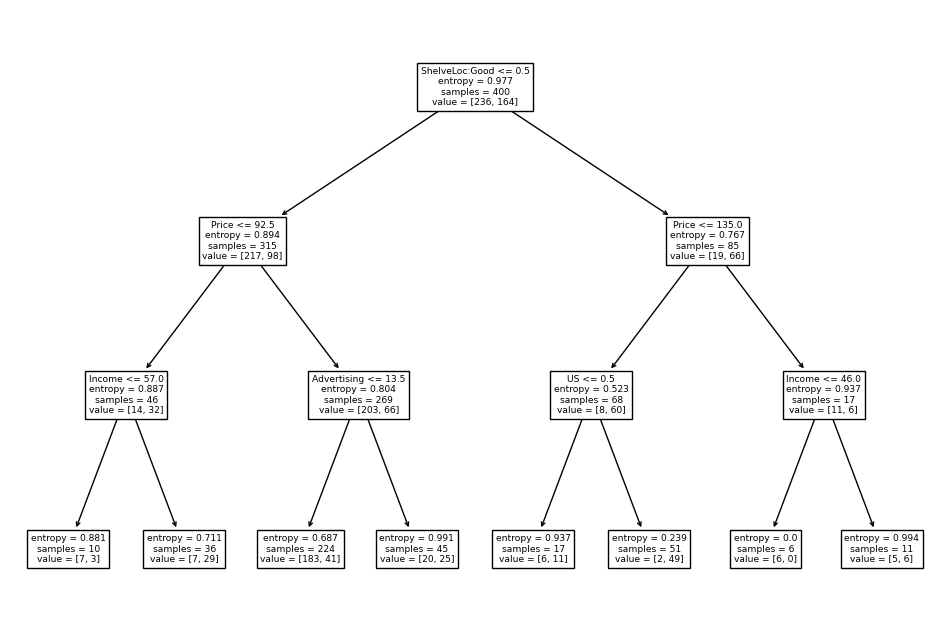

In [78]:
ax = subplots(figsize=(12,8))[1]
plot_tree(clf,feature_names=feature_names ,ax=ax);

In [79]:
print(export_text(clf,feature_names=list(feature_names) ,show_weights=True))

|--- ShelveLoc:Good <= 0.50
|   |--- Price <= 92.50
|   |   |--- Income <= 57.00
|   |   |   |--- weights: [7.00, 3.00] class: No
|   |   |--- Income >  57.00
|   |   |   |--- weights: [7.00, 29.00] class: Yes
|   |--- Price >  92.50
|   |   |--- Advertising <= 13.50
|   |   |   |--- weights: [183.00, 41.00] class: No
|   |   |--- Advertising >  13.50
|   |   |   |--- weights: [20.00, 25.00] class: Yes
|--- ShelveLoc:Good >  0.50
|   |--- Price <= 135.00
|   |   |--- US <= 0.50
|   |   |   |--- weights: [6.00, 11.00] class: Yes
|   |   |--- US >  0.50
|   |   |   |--- weights: [2.00, 49.00] class: Yes
|   |--- Price >  135.00
|   |   |--- Income <= 46.00
|   |   |   |--- weights: [6.00, 0.00] class: No
|   |   |--- Income >  46.00
|   |   |   |--- weights: [5.00, 6.00] class: Yes



In [85]:
validation = skm.ShuffleSplit(n_splits=1,test_size=200,random_state=0)
results = skm.cross_validate(clf,x,High,cv=validation)
results['test_score']

array([0.69])